<b><font size='4.5'>Nurmukhamed Masidinov - Linear Regression Practice</font></b>

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

In [3]:
df = pd.read_csv('fuelconsumption.csv')
                

In [7]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 639 entries, 0 to 638
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Year              639 non-null    int64  
 1   MAKE              639 non-null    object 
 2   MODEL             639 non-null    object 
 3   VEHICLE CLASS     639 non-null    object 
 4   ENGINE SIZE       639 non-null    float64
 5   CYLINDERS         639 non-null    int64  
 6   TRANSMISSION      639 non-null    object 
 7   FUEL              639 non-null    object 
 8   FUEL CONSUMPTION  639 non-null    float64
 9   COEMISSIONS       639 non-null    int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 50.1+ KB


,Year,ENGINE SIZE,CYLINDERS,FUEL CONSUMPTION,COEMISSIONS
count,639.0,639.000000,639.000000,639.000000,639.000000
mean,2000.0,3.265728,5.805947,14.713615,296.809077
std,0.0,1.231012,1.625588,3.307044,65.504178
min,2000.0,1.000000,3.000000,4.900000,104.000000
25%,2000.0,2.200000,4.000000,12.500000,253.000000
50%,2000.0,3.000000,6.000000,14.400000,288.000000
75%,2000.0,4.300000,6.000000,16.600000,343.000000
max,2000.0,8.000000,12.000000,30.200000,582.000000


Text(0.5, 1.05, 'Engine Size to Fuel Consumption')

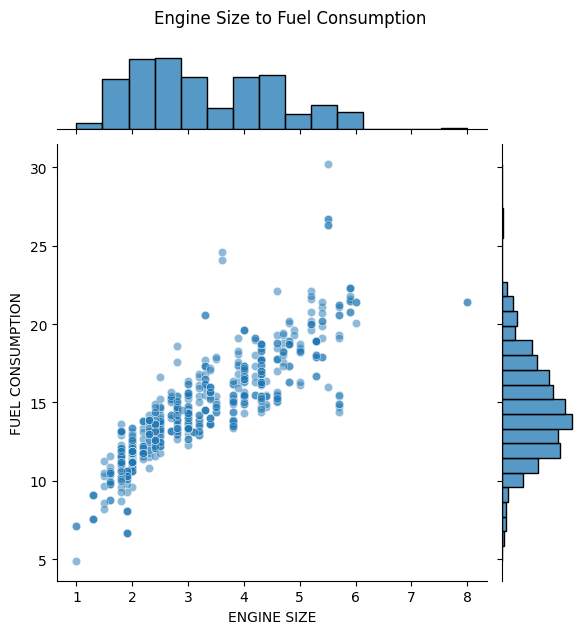

In [19]:
size_fuel=sns.jointplot(x = 'ENGINE SIZE', y = 'FUEL CONSUMPTION', data = df, alpha = 0.5)
size_fuel.fig.suptitle('Engine Size to Fuel Consumption',y = 1.05)

Text(0.5, 1.05, 'Cylinders to Fuel Consumption')

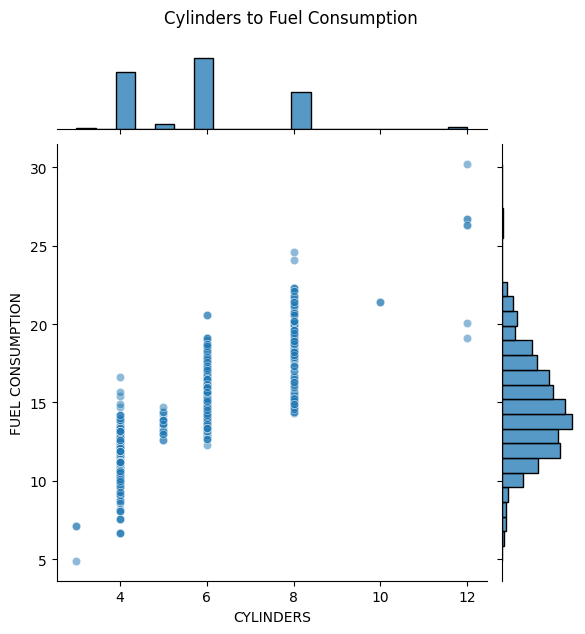

In [20]:
cyl_fuel = sns.jointplot(x = 'CYLINDERS', y = 'FUEL CONSUMPTION',data = df,alpha = 0.5)
cyl_fuel.fig.suptitle('Cylinders to Fuel Consumption',y = 1.05)

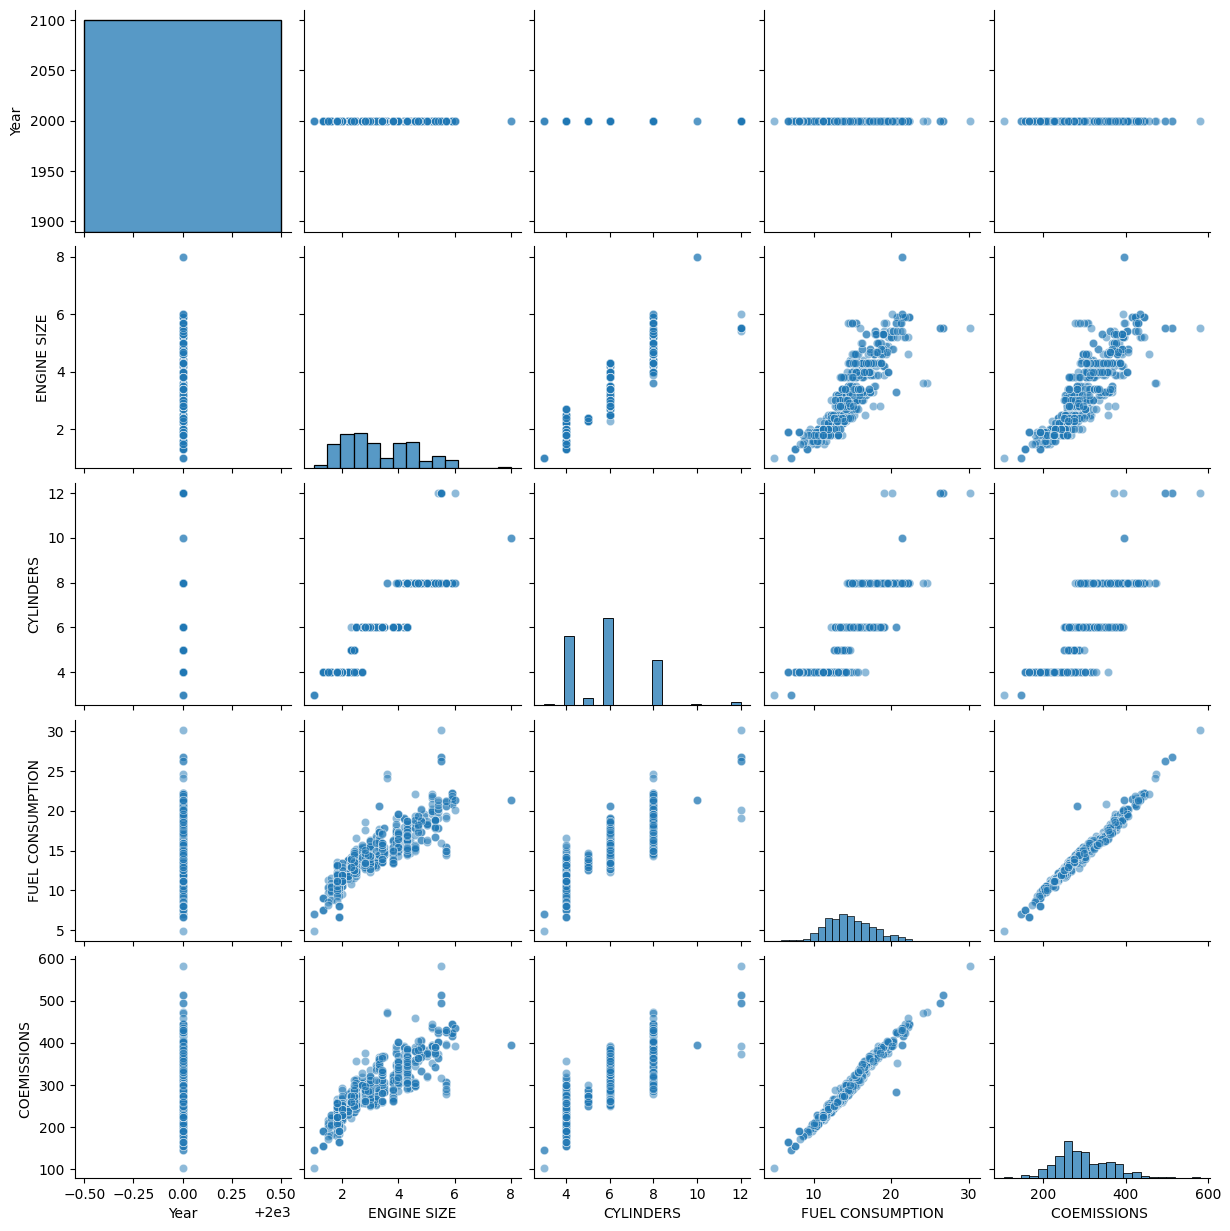

In [22]:
sns.pairplot(data = df, kind='scatter',plot_kws={'alpha':0.5})

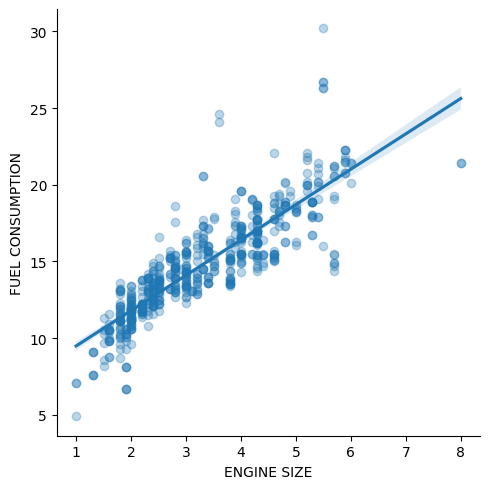

In [35]:
sns.lmplot(x ='ENGINE SIZE',
           y ='FUEL CONSUMPTION',
           data = df,
           scatter_kws={'alpha':0.3})

In [38]:
from sklearn.model_selection import train_test_split

In [44]:
x = df[['Year','ENGINE SIZE','CYLINDERS']]
y = df['FUEL CONSUMPTION']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25,random_state = 23)

In [45]:
x_train

,Year,ENGINE SIZE,CYLINDERS
589,2000,2.0,4
540,2000,2.7,4
183,2000,3.8,6
535,2000,2.0,4
569,2000,2.4,4
...,...,...,...
237,2000,5.0,8
31,2000,2.5,6
488,2000,3.2,6
40,2000,2.8,6


In [46]:
x_test


,Year,ENGINE SIZE,CYLINDERS
536,2000,1.6,4
485,2000,3.4,6
166,2000,3.3,6
528,2000,1.8,4
26,2000,2.7,6
...,...,...,...
453,2000,3.3,6
571,2000,3.4,6
143,2000,3.5,6
270,2000,3.0,6


In [47]:
y_train

589    11.2
540    15.4
183    15.2
535    11.8
569    12.2
       ... 
237    18.7
31     14.6
488    15.9
40     13.0
595    13.2
Name: FUEL CONSUMPTION, Length: 479, dtype: float64

In [48]:
y_test

536    10.5
485    15.7
166    14.5
528    10.3
26     15.2
       ... 
453    17.3
571    15.3
143    14.7
270    13.6
86     13.9
Name: FUEL CONSUMPTION, Length: 160, dtype: float64

In [49]:
from sklearn.linear_model import LinearRegression

In [55]:
linear_model = LinearRegression()

In [56]:
linear_model.fit(x_train,y_train)

LinearRegression()

In [57]:
linear_model.coef_

array([0.        , 1.55702755, 0.6083105 ])

<b><font size = '3'>Linear Regression Formula</font></b>
- $y$ is the dependent variable you're trying to predict.
- $\beta_0$ is the intercept term.
- $\beta_1, \beta_2, \ldots, \beta_n$ are the coefficients of the independent variables $x_1, x_2, \ldots, x_n$.
- $\epsilon$ is the error term, accounting for the difference between the predicted and actual values.

$y = \beta_0 + \beta_1x_1 + \beta_2x_2 + \cdots + \beta_nx_n + \epsilon$


In [58]:
predictions = linear_model.predict(x_test)
print(predictions)

[11.09666948 15.11594008 14.96023732 11.40807499 14.02602079 17.57818312
 14.80453457 14.49312906 12.03088601 19.13521068 19.13521068 11.7194805
 11.56377775 14.49312906 11.09666948 11.40807499 20.22512996 15.7387511
 15.7387511  12.03088601 11.7194805  12.34229153 17.88958863 17.73388588
 11.40807499 15.7387511  18.66810241 14.49312906 14.96023732 17.11107486
 14.49312906 11.09666948 18.51239965 11.56377775 11.09666948 19.13521068
 18.66810241 11.7194805  15.11594008 11.40807499 11.56377775 14.18172355
 11.7194805  18.20099414 16.51726488 11.56377775 12.49799428 14.49312906
 11.09666948 16.51726488 10.62956122 11.40807499 18.3566969  12.03088601
 17.26677761 14.96023732 11.09666948 18.3566969  14.18172355 15.11594008
 10.94096673 14.02602079 11.40807499 14.49312906 14.49312906 19.29091343
 18.51239965 17.88958863 19.29091343 17.73388588 15.11594008 14.80453457
 14.80453457 11.40807499 12.34229153 14.96023732 15.89445386 11.7194805
 13.71461528 13.71461528 15.11594008 16.51726488 13.71

Text(0.5, 1.0, 'Linear Model Evaluation')

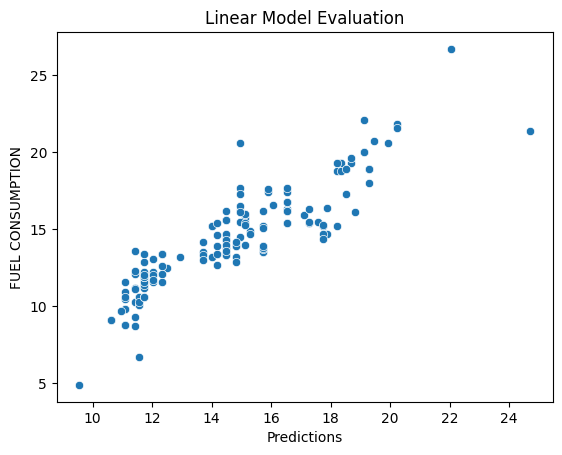

In [59]:
sns.scatterplot(x=predictions,y =y_test)
plt.xlabel('Predictions')
plt.title('Linear Model Evaluation')